In [13]:
import qclus
import scanpy as sc
import numpy as np
import pandas as pd

In [14]:
counts_path = "samples/filtered_feature_bc_matrix_739.h5"
loompy_path = "samples/counts_counts_CAD_739.loom"
adata = qclus.run_qclus(counts_path,  
                        loompy_path)

/Users/johannesojanen/opt/anaconda3/envs/qclus/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/johannesojanen/opt/anaconda3/envs/qclus/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/johannesojanen/opt/anaconda3/envs/qclus/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/johannesojanen/opt/anaconda3/envs/qclus/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

In [15]:
adata

AnnData object with n_obs × n_vars = 3404 × 36601
    obs: 'fraction_unspliced', 'pct_counts_MT', 'total_counts', 'n_genes_by_counts', 'qclus'
    var: 'gene_ids', 'feature_types', 'genome'

In [16]:
adata.obs.qclus.value_counts()

passed               2389
initial filter        338
scrublet filter       274
outlier filter        229
clustering filter     174
Name: qclus, dtype: int64

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#save raw dataset and filter genes
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.filter_genes(adata, min_cells=10)
adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_MT'], n_jobs = 30)
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver='randomized')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

/Users/johannesojanen/opt/anaconda3/envs/qclus/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/johannesojanen/opt/anaconda3/envs/qclus/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


/Users/johannesojanen/opt/anaconda3/envs/qclus/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


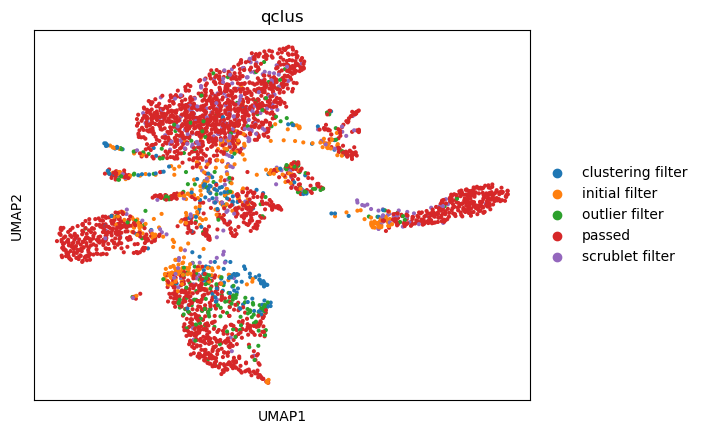

In [18]:
sc.pl.umap(adata, color="qclus")

In [19]:
adata = adata[adata.obs.qclus=="passed"]
adata

View of AnnData object with n_obs × n_vars = 2389 × 6388
    obs: 'fraction_unspliced', 'pct_counts_MT', 'total_counts', 'n_genes_by_counts', 'qclus', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'qclus_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [20]:
sc.tl.pca(adata, svd_solver='randomized')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

/Users/johannesojanen/opt/anaconda3/envs/qclus/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


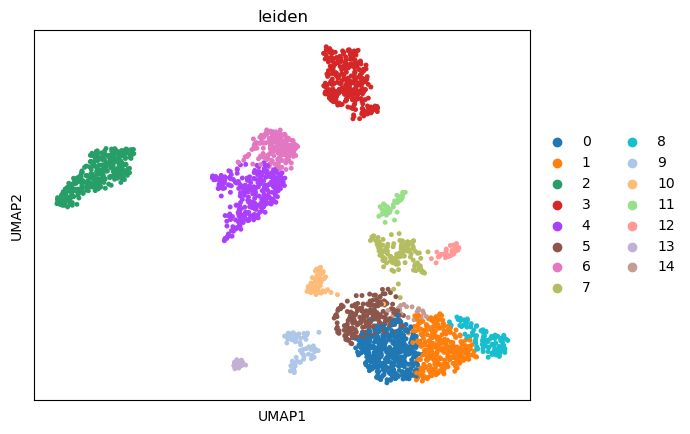

In [21]:
sc.pl.umap(adata, color="leiden")